---
title: "Distribution (pdf, cdf) of iris data"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, statistics, distribution]
image: "distribution.jpg"

---

# **Iris data set distribution (pdf and cdf) exploration**
Lets explore distribution functions pdf and cdf using Iris data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore');

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')

In [6]:
iris['type'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64

In [8]:
setosa=iris[iris['type']=="Iris-setosa"]
setosa['petal_length'].value_counts()

1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

## **Basic scatter plot**

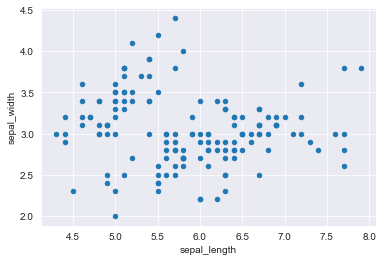

In [9]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

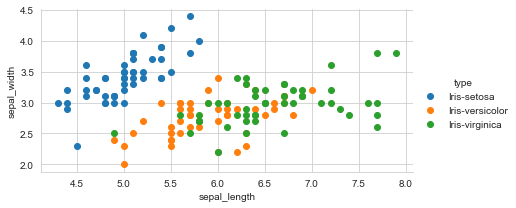

In [29]:
#here we plot the scatter diagram with colour coding
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue="type",aspect = 2).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

## **Pair plotting**
For cross-referencing

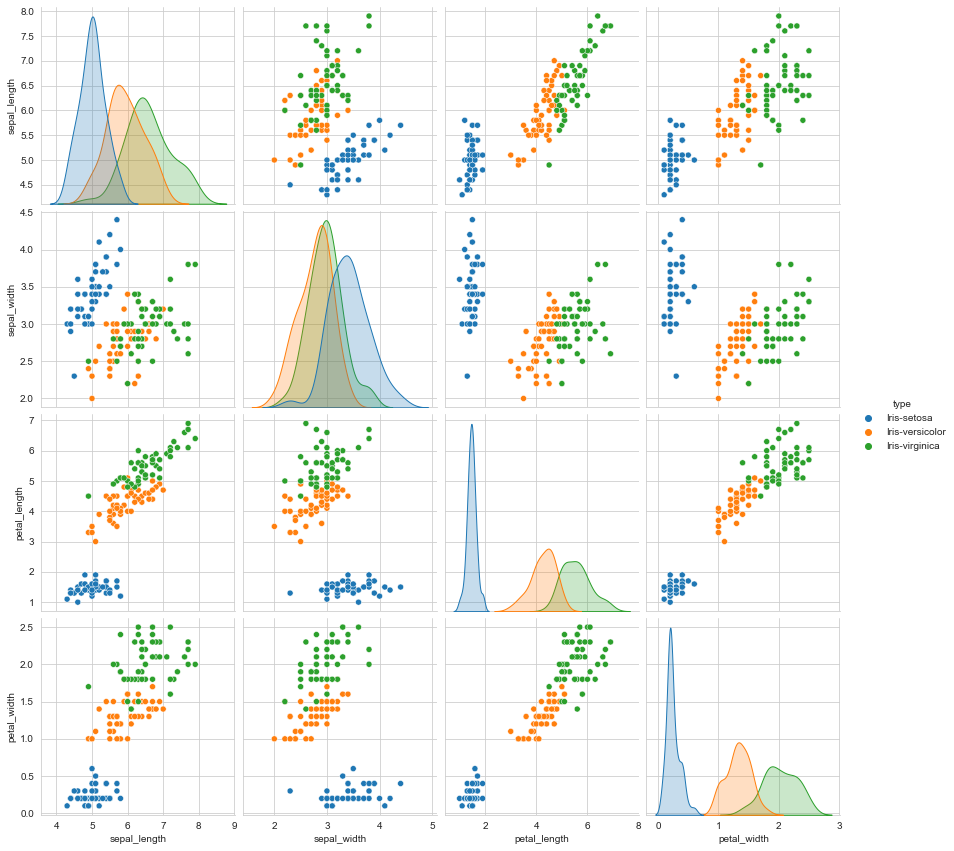

In [13]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris,hue="type",size=3)
plt.show()

## **probability density function (pdf), cumulative distribution function (cdf) and histogram**

In [16]:
setosa=iris.loc[iris["type"]=="Iris-setosa"]
versicolor=iris.loc[iris["type"]=="Iris-versicolor"]
virginica=iris.loc[iris["type"]=="Iris-virginica"]

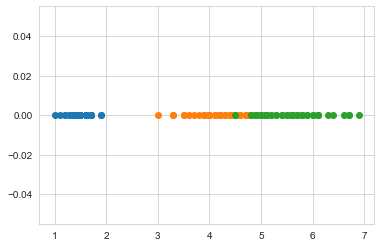

In [17]:
plt.plot(setosa["petal_length"],np.zeros_like(setosa['petal_length']), 'o')
plt.plot(versicolor["petal_length"],np.zeros_like(versicolor['petal_length']), 'o')
plt.plot(virginica["petal_length"],np.zeros_like(virginica['petal_length']), 'o')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

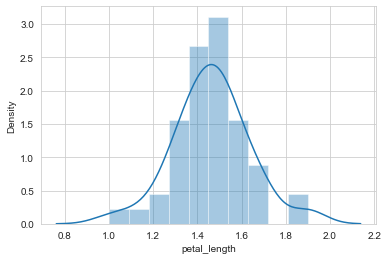

In [18]:
sns.distplot(iris[iris['type']== 'Iris-setosa']['petal_length'])

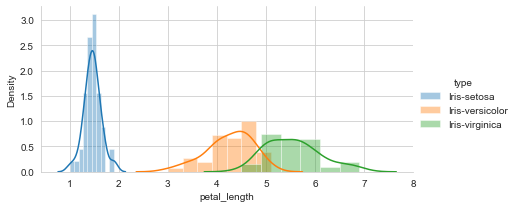

In [26]:
sns.FacetGrid(iris, hue="type",aspect = 2).map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

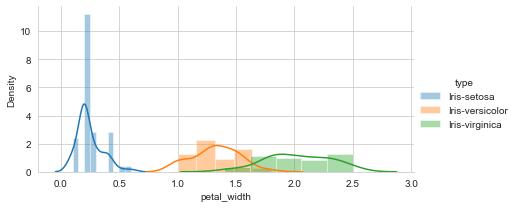

In [30]:
sns.FacetGrid(iris, hue="type", aspect = 2).map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

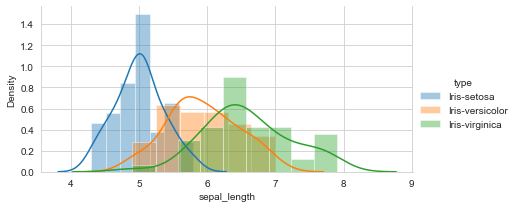

In [31]:
sns.FacetGrid(iris, hue="type", aspect=2).map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

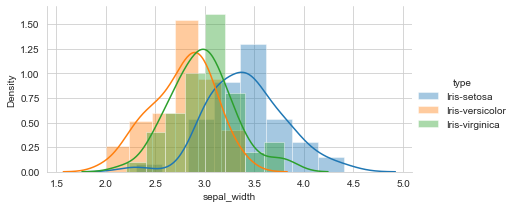

In [32]:
sns.FacetGrid(iris, hue="type", aspect=2).map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

## **PDF point evaluation**

histogram counts
 [ 1  1  2  7 12 14  7  4  0  2]
Sum of count is
 50
bin edges 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF below 
 [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


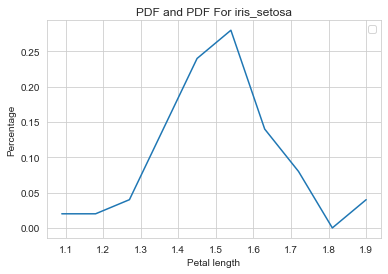

In [33]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10,
                                 density = False)

print("histogram counts\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))
print("bin edges \n",bin_edges)
print("PDF below \n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF and PDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)

## **CDF point evaluation**

histogram counts
 [ 1  1  2  7 12 14  7  4  0  2]
Sum of count is
 50
bin edges 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is below  
 [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
CDF is below
 [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


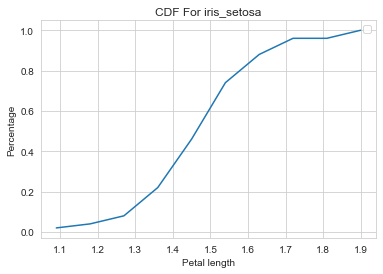

In [34]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10,
                                 density = False)

print("histogram counts\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))
print("bin edges \n",bin_edges)
print("PDF is below  \n",pdf);

cdf = np.cumsum(pdf)
print("CDF is below\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.plot(bin_edges[1:],cdf)

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


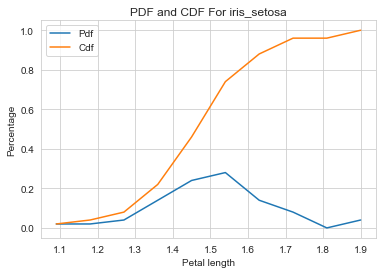

In [35]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10,
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


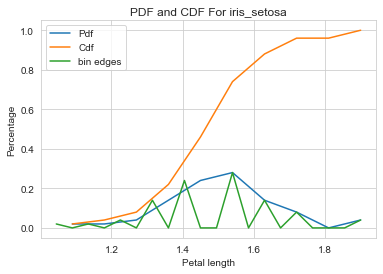

In [36]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(setosa['petal_length'], bins=20,
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.gca().legend(('Pdf','Cdf','bin edges'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

## **All type of petals/species PDF & CDF**

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


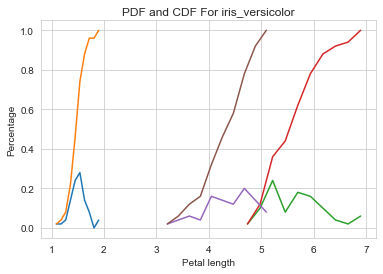

In [37]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

## **Calculation of mean, variance & std. deviation**

In [38]:
#Mean, Variance, Std-deviation,
print("Means:")
print(np.mean(setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(setosa["petal_length"],50)));
print(np.mean(virginica["petal_length"]))
print(np.mean(versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(setosa["petal_length"]))
print(np.std(virginica["petal_length"]))
print(np.std(versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


## **Median, quantiles, percentiles & IQRs**

In [39]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(setosa["petal_length"],50)));
print(np.median(virginica["petal_length"]))
print(np.median(versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(setosa["petal_length"],90))
print(np.percentile(virginica["petal_length"],90))
print(np.percentile(versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(setosa["petal_length"]))
print(robust.mad(virginica["petal_length"]))
print(robust.mad(versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Boxploting

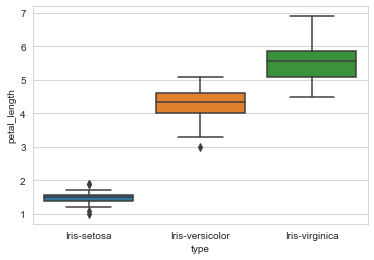

In [40]:
sns.boxplot(x='type',y='petal_length', data=iris)
plt.show()

## Violiin plotting

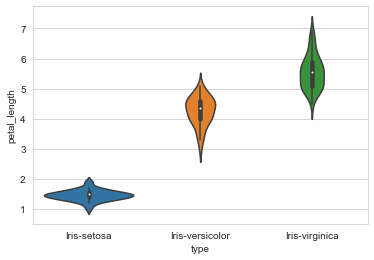

In [42]:
sns.violinplot(x="type", y="petal_length", data=iris, size=8)
plt.show()

## Lastly multivariate probability density & contour plot

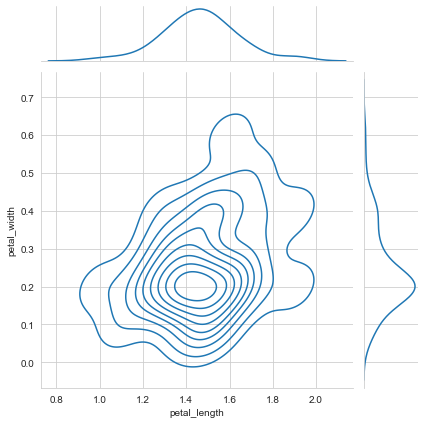

In [43]:
sns.jointplot(x="petal_length", y="petal_width", data=setosa, kind="kde");
plt.show();